# linear regression AutoGrad

In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt
import time

from autograd import grad

In [2]:
np.random.seed(1)
n_samples = 50
X_data = np.linspace(1, 50, n_samples).reshape((n_samples, 1))
Y = 10*X_data + 6 + 10*np.random.randn(n_samples).reshape((n_samples, 1))
# Y = Y.reshape((n_samples, 1))
X = np.hstack([X_data, np.ones((n_samples, 1))])
f = open('dataset', 'w+')
f2 = open('label', 'w+')
for x in X.tolist():
    f.write(str(x[0]) + '\n')
for y in Y.tolist():
    f2.write(str(y[0]) + '\n')
f.close()
f2.close()


In [3]:
def cost(w):
    pred = np.dot(X, w)
    return np.sqrt(((pred - Y) ** 2).mean(axis=None))

In [4]:
for itr in[1000,10000,100000]:
    print('itr: '+str(itr))
    start_time = time.time()



    grad_cost= grad(cost)

    W = np.random.randn()
    b =np.random.randn()
    Weights = np.array([W, b]).reshape((2, 1))
    for i in range(0,itr):
        temp = Weights
        Weights = Weights - grad_cost(Weights)*0.01
    print (cost(Weights), Weights)
    print(i)
    print("--- %s seconds ---" % (time.time() - start_time))

itr: 1000
9.72683588618796 [[10.16907931]
 [ 0.73121202]]
999
--- 0.379457950592041 seconds ---
itr: 10000
9.622738306733089 [[10.09186805]
 [ 3.32992384]]
9999
--- 3.786053419113159 seconds ---
itr: 100000
9.621616795545814 [[10.0830056]
 [ 3.6282086]]
99999
--- 37.526790618896484 seconds ---


# linear regression pytorch

In [9]:
from sklearn.datasets import load_boston
import torch
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

iter: 1000
--- 0.252382755279541 seconds ---


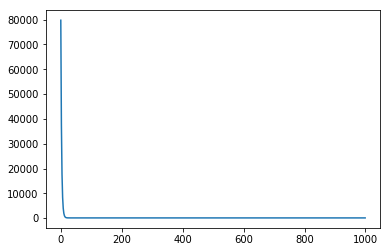

95.6255874633789
iter: 10000
--- 2.533329725265503 seconds ---


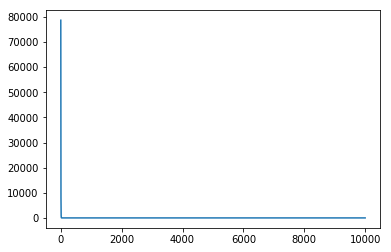

93.34428405761719
iter: 100000
--- 25.739325284957886 seconds ---


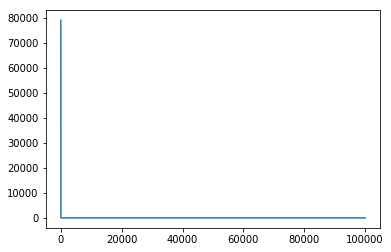

92.57568359375


In [10]:


for itr in [1000,10000,100000]:
    print('iter: '+str(itr))
    start_time = time.time()
    x = X_data
    y= Y
    x = Variable(torch.from_numpy(x).float())
    y = Variable(torch.from_numpy(y).float())

    linear = nn.Linear(1, 1)

    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(linear.parameters(),lr = 0.0001)
    loss2 = []


    for i in range(itr):
        optimizer.zero_grad()
        outputs = linear(x)

        loss = criterion(outputs, y)
        loss2.append(loss.data[0])
        loss.backward()        

        optimizer.step()

    print("--- %s seconds ---" % (time.time() - start_time))
    plt.plot(range(itr), loss2)
    plt.show()

    print(loss2[-1])

#https://discuss.pytorch.org/t/simple-linear-regression-with-pytorch/11070